In [50]:
import time
import rsa
import numpy as np
import matplotlib.pyplot as plt
import generate_key as key

In [51]:
decrypt_time = []
bit_count = []
text = 'hello'
def init_attack(i):
    (e, n), (d, n) = key.generate_key(i)
    if(len(bit_count) > 0 and bit_count[-1] >= n.bit_length()):
        print(f'Skipped smaller n size previous: {bit_count[-1]} , current: {n.bit_length()}')
        i += 1
        return i
    elif(len(bit_count) > 0 and bit_count[-1]+2 <= n.bit_length()):
        print(f'Skipped large jump size previous: {bit_count[-1]} , current: {n.bit_length()}')
        i-=1
        return i
    encoded = rsa.encode(text)
    encrypted = rsa.group_encrypt(encoded, e, n)
    #-----------------Attack-----------------
    d_init = e // 100
    dec = rsa.group_decrypt(encrypted, d_init, n)
    decoded = rsa.decode(dec)
    print(f"Initiating attack : e = {e},  d = {d}, d_init = {d_init}, d-d_init = {d-d_init}")
    start = time.time()
    while text != decoded:
        d_init += 1
        dec = rsa.group_decrypt(encrypted, d_init, n)
        decoded = rsa.decode(dec)
        if(d_init % 5000000 == 0):
            print(f"d_init = {d_init}, d-d_init = {d-d_init}")
    print(decoded)
    end = time.time()
    time_taken = round(end - start, 4)
    print(f"Execution time: {time_taken} seconds , i = {i} , n = {n.bit_length()} bits , d = {d} , d_init = {d_init}")
    #----------------------------------------
    decrypt_time.append(time_taken)
    bit_count.append(n.bit_length())
    return i + 1

In [52]:
start = 22
end = 40
decrypt_time = []
bit_count = []
i = start
while i < end + 1:
    i = init_attack(i)
    print('decrypted time : ',decrypt_time,'\nnumber of bits : ',bit_count)

Initiating attack : e = 53859455,  d = 31042115, d_init = 538594, d-d_init = 30503521
hello
Execution time: 8.5195 seconds , i = 22 , n = 26 bits , d = 31042115 , d_init = 2211713
decrypted time :  [8.5195] 
number of bits :  [26]
Skipped smaller n size previous: 26 , current: 26
decrypted time :  [8.5195] 
number of bits :  [26]
Initiating attack : e = 41004979,  d = 14609659, d_init = 410049, d-d_init = 14199610
d_init = 5000000, d-d_init = 9609659
d_init = 10000000, d-d_init = 4609659
hello
Execution time: 69.674 seconds , i = 24 , n = 27 bits , d = 14609659 , d_init = 14609659
decrypted time :  [8.5195, 69.674] 
number of bits :  [26, 27]
Initiating attack : e = 154450421,  d = 112037981, d_init = 1544504, d-d_init = 110493477
hello
Execution time: 5.1896 seconds , i = 25 , n = 28 bits , d = 112037981 , d_init = 2557981
decrypted time :  [8.5195, 69.674, 5.1896] 
number of bits :  [26, 27, 28]
Skipped large jump size previous: 28 , current: 30
decrypted time :  [8.5195, 69.674, 5.1

KeyboardInterrupt: 

In [ ]:
print(decrypt_time)
print(bit_count)

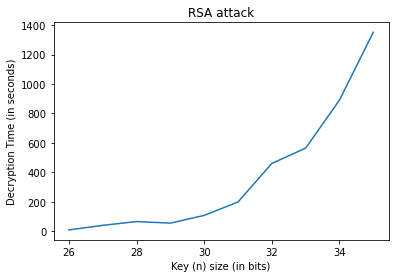

In [54]:
y = [8.5195, 39.674, 65.1896, 54.6741, 107.2923, 198.2902, 460.3727, 564.4738, 890.8927,1352.0962] 
x =  [26, 27, 28, 29, 30, 31, 32, 33,34,35]
plt.figure(facecolor='w')
plt.plot(x,y)
plt.xlabel('Key (n) size (in bits)')
plt.ylabel('Breaking Time (in seconds)')
plt.title('RSA attack')
plt.show()

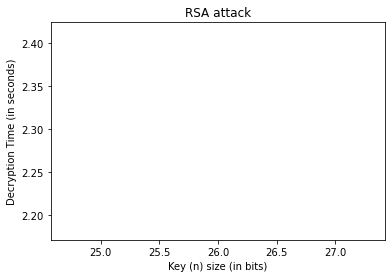

In [ ]:

x = np.linspace(0, end, len(decrypt_time))
plt.figure(facecolor='w')
plt.plot(bit_count,decrypt_time)
plt.xlabel('Key (n) size (in bits)')
plt.ylabel('Decryption Time (in seconds)')
plt.title('RSA attack')
plt.show()